Telecom_customer_churn worksheet

In [404]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [405]:
customer_churn=pd.read_csv('Telecom_customer_churn.csv')
customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [406]:
df=pd.DataFrame(customer_churn)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


SEPARATING THE CATEGORICAL AND THE CONTINOUS FEATURES

In [408]:
#separating object dtypes from float and int
cat=[]
cont=[]
for i in df.columns:
    if(df[i].dtypes=='object'):
        cat.append(i)
    else:
        cont.append(i)
cat

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [409]:
cont

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [410]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:>

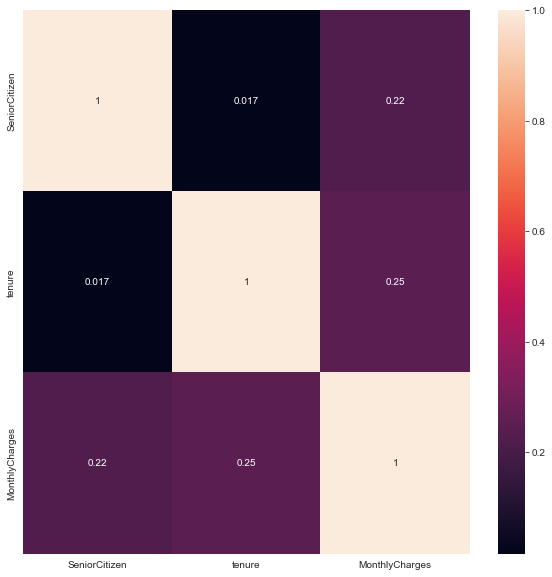

In [411]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

CHECKING FOR NULL VALUES

In [412]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [413]:
#checking the cardinality of categorical columns
df[cat].nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

In [414]:
df[cont].nunique()

SeniorCitizen        2
tenure              73
MonthlyCharges    1585
dtype: int64

THE SENIOR CITIZEN COLUMN CANNOT BE TREATED LIKE A CONTINOUS COLUMN BUT A CATEGORICAL ONE.

SINCE THERE'S NO MISSING VALUES/OUTLIERS TO BE HANDLED, MOVING ON TO VISUALIZATION AND EDA

<AxesSubplot:xlabel='gender', ylabel='count'>

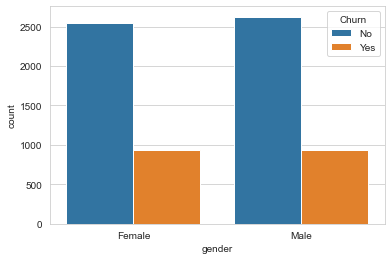

In [415]:
sns.set_style('whitegrid')
sns.countplot(hue='Churn',x='gender',data=df)

THE CHURN IS ALMOST EQUAL FOR BOTH THE MALES AND FEMALES.

<AxesSubplot:xlabel='Partner', ylabel='count'>

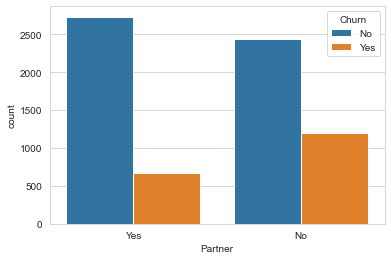

In [416]:
sns.set_style('whitegrid')
sns.countplot(x='Partner',hue='Churn',data=df)

THE CUSTOMERS WITHOUT A PARTNER ARE MORE LIKELY TO CHURN.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

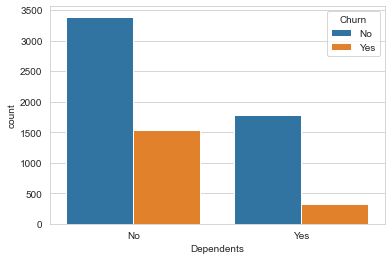

In [417]:
sns.set_style('whitegrid')
sns.countplot(x='Dependents',hue='Churn',data=df)

THE CUSTOMERS WITHOUT DEPENDENTS WERE MORE LIKELY TO CHURN

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

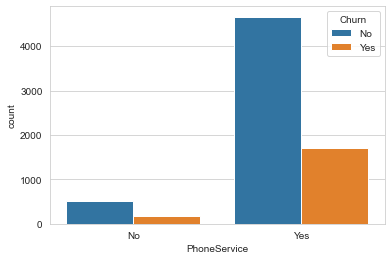

In [418]:
sns.set_style('whitegrid')
sns.countplot(x='PhoneService',hue='Churn',data=df)

MOST CUTOMERS WERE HAVING PHONE SERVICES AND MOST OF THEM DIDN'T CHURN.THE PROPOTION OF CUSTOMES CHURN TO CUSTOMER STAYED IS IN THE RATIO 4500:1800 OR 5:3.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

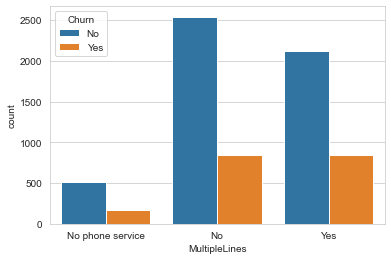

In [419]:
sns.set_style('whitegrid')
sns.countplot(x='MultipleLines',hue='Churn',data=df)

MOST CUSTOMERS WERE HAVING PHONE SERVICES
THE CUSTOMERS HAVING MULTIPLE LINES AND THE ONES WITHOUT THEM CHURN EQUALLY.
THE CUSTOMERS HAVING PHONE SERVICES BUT NO MULTIPLE LINES SHOWED BETTER CHURN:NOT CHURN RATIO THAN THE ONES WITH MULTIPLE LINES.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

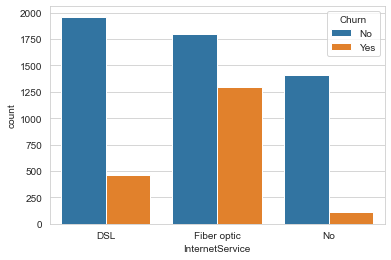

In [420]:
sns.set_style('whitegrid')
sns.countplot(x='InternetService',hue='Churn',data=df)

1)the cutomers with no internet services churn the least.
2)the customers with fiber optic internet services churned the most.
3)the custumers with DSL services are the ones having the highest number of 'no churn'.
conclusion: 
THE CUSTOMERS WITHOUT INTERNET SERVICES SHOWED MAXIMUM LOYALTY AS COMPARED TO THE OTHERS WITH A RATIO OF 13:1(approx).

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

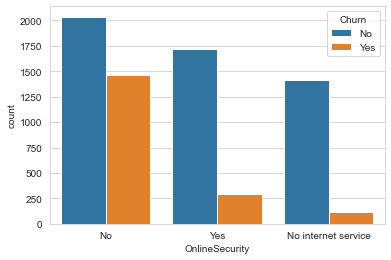

In [421]:
sns.set_style('whitegrid')
sns.countplot(x='OnlineSecurity',hue='Churn',data=df)

1)customers without internet services have the least number of churn.
2)the customers having internet services but no online security have the most number of churn.
CONCLUSION:
THE CUSTOMERS WITHOUT INTERNET SERVICES SHOWED THE BEST LOYALTY FIGURES WITH 1 PERSON CHURNING IN FOR EVERY 14 PEOPLE THAT DON'T.(14:1 RATION Approx.)
THE CUTOMERS WITH INTERNET SERVICES BUT NO ONLINE SECURITY HAD THE MOST NUMBER OF PEOPLE THAT CHURN WITH 7PEOPLE LEAVING FOR EVERY 10 PEOPLE STAYING.(10/7 Approx.)

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

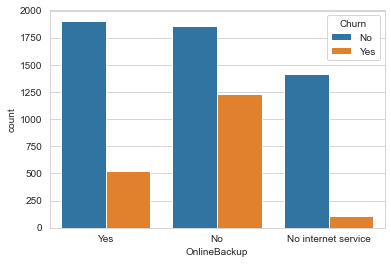

In [422]:
sns.set_style('whitegrid')
sns.countplot(x='OnlineBackup',hue='Churn',data=df)

THE PEOPLE WITH NO INTERNET SERVICES CHURNED THE LEAST WITH 1 PERSON LEAVING FOR EVERY 14 THAT STAY(14:1 Approx.)
THE PEOPLE WITH NO ONLINE BACKUP WERE MORE LIKELY TO CHURN WITH 2 PEOPLE LEAVING FOR EVERY 3.5 PEOPLE STAYING.(3:2 Approx)

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

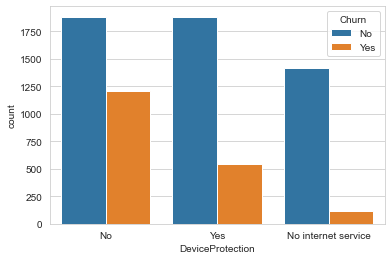

In [423]:
sns.set_style('whitegrid')
sns.countplot(x='DeviceProtection',hue='Churn',data=df)

THE PEOPLE WITH NO INTERNET SERVICES CHURNED THE LEAST WITH 1 PERSON LEAVING FOR EVERY 14 THAT STAY(14:1 Approx.) 
THE PEOPLE WITH INTERNET SERVICES BUT NO DEVICE PROTECTION HAD A GREATER CHURN RATE (3:2 Approx.) people staying to people leaving ratio.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

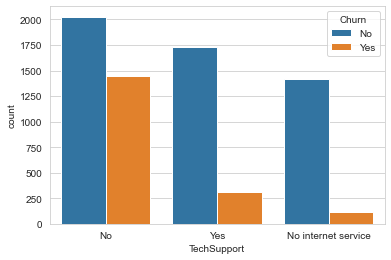

In [424]:
sns.set_style('whitegrid')
sns.countplot(x='TechSupport',hue='Churn',data=df)

THE PEOPLE WITH NO INTERNET SERVICES CHURNED THE LEAST WITH 1 PERSON LEAVING FOR EVERY 14 THAT STAY(14:1 Approx.) 
THE CUSTOMERS WITH TECH SUPPORT HAD A RATIO OF 17:3(Approx.).
THE PEOPLE WITHOUT TECH SUPPORT BUT HAVING INTERNET SERVICES CONSTITUTED THE BULK OF THE CUSTOMER CHURN WITHA RATIO OF 10:7.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

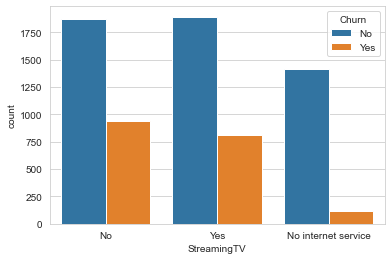

In [425]:
sns.set_style('whitegrid')
sns.countplot(x='StreamingTV',hue='Churn',data=df)

THE PEOPLE WITH NO INTERNET SERVICES CHURNED THE LEAST WITH 1 PERSON LEAVING FOR EVERY 13 THAT STAY(13:1 Approx.) .
THE ONES WITH THE INTERNET SERVICES AND NO STREAMING TV HAD A RATIO OF 2:1(approx.) and the ones with streaming tv of 9:4(approx.)

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

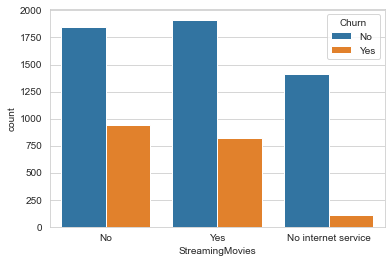

In [426]:
sns.set_style('whitegrid')
sns.countplot(x='StreamingMovies',hue='Churn',data=df)

THE PEOPLE WITH NO INTERNET SERVICES CHURNED THE LEAST WITH 1 PERSON LEAVING FOR EVERY 14 THAT STAY(14:1 Approx.)

<AxesSubplot:xlabel='Contract', ylabel='count'>

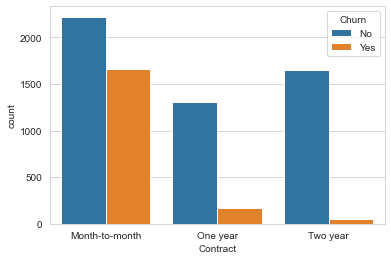

In [427]:
sns.set_style('whitegrid')
sns.countplot(x='Contract',hue='Churn',data=df)

MOST CUSTOMERS WERE ON A MONTH TO MONTH CONTRACT.
1)THE CUSTOMERS ON A TWO YEAR CONTRACT HAD THE LEAST CHURN AMONG THE THREE WITH 15 PEOPLE STAYING FOR ONE PERSON CHURN.(15:1)approx.
2)THE PEOPLE ON A MONTH TO MONTH CONTRACT HAD THE MOST CHURN WITH 2 CUSTOMERS LEAVING FOR EVERY 3 THAT STAY.(3:2 RATIO STAY:CHURN).

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

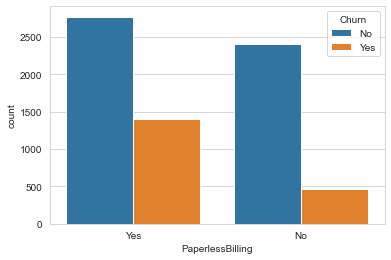

In [428]:
sns.set_style('whitegrid')
sns.countplot(x='PaperlessBilling',hue='Churn',data=df)

THE CUSTOMERS WHO HAD PAPERLESS BILLING HAD THE LEAST STAY TO CHURN RATIO (8:1) WITH ONE PERSON CHURNING FOR EVERY 8 THAT STAY.


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

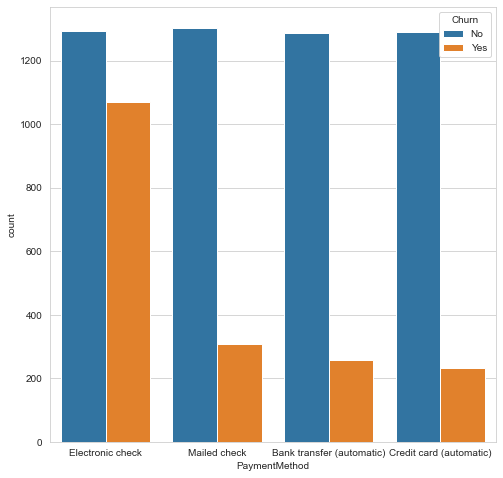

In [429]:
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.countplot(x='PaymentMethod',hue='Churn',data=df)

THE RATIOS  FOR EVERY PAYMENT METHOD:
    1)electronic check-(13:11)approx.
    2)mailed check- 13:3(approx)
    3)Bank transfer-13:2.7(approx)
    4)Credit card(automatic)-(13:2.3) approx.
CONCLUSION:
THE PEOPLE PAYING WITH CREDIT CARD HAD THE LEAST CHURN WITH APPROXIMATELY 2 PEOPLE LEAVING FOR EVERY 13 THAT STAY.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

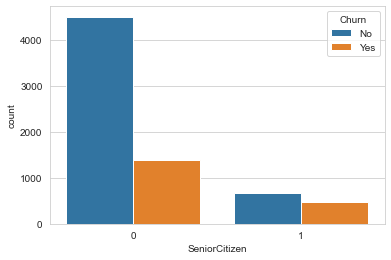

In [430]:
sns.set_style('whitegrid')
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

PEOPLE WHO ARE NOT SENIOR CITIZENS(assuming that 1 is for senior citizens and 0 for not) ARE LESS LIKELY TO CHURN AS ONLY ONE PERSON LEFT FOR EVERY 4 AS COMPARED TO 7:6 RATIO OF SENIOR CITIZENS.

In [431]:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


PROCEEDING WITH ENCODING THE CATEGORICAL DATA

In [432]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [433]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat:
    df[i]=le.fit_transform(df[i])

In [434]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [435]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [436]:
df.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

PROCEEDING TO THE MACHINE LEARNING PART

In [437]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [438]:
from sklearn.model_selection import train_test_split

In [439]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [440]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

TRAINING THE MODELS AND PREDICTING THE VALUES

LOGISTIC REGRESSION

In [441]:
log=LogisticRegression()
log.fit(x_train,y_train)
pred_log=log.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred_log))
print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log))

accuracy score 0.8
[[1508  189]
 [ 276  352]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1697
           1       0.65      0.56      0.60       628

    accuracy                           0.80      2325
   macro avg       0.75      0.72      0.73      2325
weighted avg       0.79      0.80      0.80      2325



DECISION TREE CLASSIFIER

In [442]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_dtc))
print("confusion matrix:",confusion_matrix(y_test,pred_dtc))
print("classification report:",classification_report(y_test,pred_dtc))

accuracy_score: 0.7294623655913979
confusion matrix: [[1350  347]
 [ 282  346]]
classification report:               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1697
           1       0.50      0.55      0.52       628

    accuracy                           0.73      2325
   macro avg       0.66      0.67      0.67      2325
weighted avg       0.74      0.73      0.73      2325



RANDOM FOREST CLASSIFIER

In [443]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_rfc))
print("confusion matrix:",confusion_matrix(y_test,pred_rfc))
print("classification report:",classification_report(y_test,pred_rfc))

accuracy_score: 0.781505376344086
confusion matrix: [[1538  159]
 [ 349  279]]
classification report:               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1697
           1       0.64      0.44      0.52       628

    accuracy                           0.78      2325
   macro avg       0.73      0.68      0.69      2325
weighted avg       0.77      0.78      0.77      2325



KNEIGHBORS CLASSIFIER

In [444]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=10)
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_knc))
print("confusion matrix:",confusion_matrix(y_test,pred_knc))
print("classification report:",classification_report(y_test,pred_knc))


accuracy_score: 0.7174193548387097
confusion matrix: [[1650   47]
 [ 610   18]]
classification report:               precision    recall  f1-score   support

           0       0.73      0.97      0.83      1697
           1       0.28      0.03      0.05       628

    accuracy                           0.72      2325
   macro avg       0.50      0.50      0.44      2325
weighted avg       0.61      0.72      0.62      2325



SUPPORT VECTOR MACHINE

In [445]:
from sklearn.svm import SVC


    
svc2=SVC(kernel='rbf')
svc2.fit(x_train,y_train)
pred_svc2=svc2.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_svc2))
print("confusion matrix:",confusion_matrix(y_test,pred_svc2))
print("classification report:",classification_report(y_test,pred_svc2))

accuracy_score: 0.7298924731182795
confusion matrix: [[1697    0]
 [ 628    0]]
classification report:               precision    recall  f1-score   support

           0       0.73      1.00      0.84      1697
           1       0.00      0.00      0.00       628

    accuracy                           0.73      2325
   macro avg       0.36      0.50      0.42      2325
weighted avg       0.53      0.73      0.62      2325



PROCEEDING TO CROSS-VALIDATION

In [446]:
from sklearn.model_selection import cross_val_score

In [449]:
cv_1=cross_val_score(log,x,y,cv=10)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.793127417794971
cross val score: [0.79716312 0.79858156 0.78723404 0.80965909 0.78267045 0.77698864
 0.79971591 0.78977273 0.77840909 0.81107955]


In [448]:
cv_2=cross_val_score(knc,x,y,cv=10)
print("mean score:",cv_2.mean())
print("cross val score:",cv_2)

mean score: 0.723269866215345
cross val score: [0.72198582 0.72624113 0.73191489 0.71732955 0.71732955 0.73153409
 0.72585227 0.70596591 0.73579545 0.71875   ]


In [450]:
cv_3=cross_val_score(dtc,x,y,cv=10)
print("mean score:",cv_3.mean())
print("cross val score:",cv_3)

mean score: 0.7212814313346227
cross val score: [0.70638298 0.74184397 0.73049645 0.69318182 0.71448864 0.73011364
 0.71306818 0.72301136 0.71306818 0.74715909]


In [451]:
cv_4=cross_val_score(svc2,x,y,cv=10)
print("mean score:",cv_4.mean())
print("cross val score:",cv_4)

mean score: 0.7346300773694391
cross val score: [0.73475177 0.73475177 0.73475177 0.73579545 0.734375   0.734375
 0.734375   0.734375   0.734375   0.734375  ]


In [452]:
cv_5=cross_val_score(rfc,x,y,cv=10)
print("mean score:",cv_5.mean())
print("cross val score:",cv_5)

mean score: 0.7817698259187621
cross val score: [0.77163121 0.78865248 0.78014184 0.77698864 0.75852273 0.76136364
 0.79545455 0.78409091 0.80113636 0.79971591]


THE LOGISTIC REGRESSION AND THE SVC(KERNEL='rbf') PERFORMED THE BEST. CHECKING THE ROC_AUC_CURVE TO DETERMINE WHICH ONE IS BETTER.


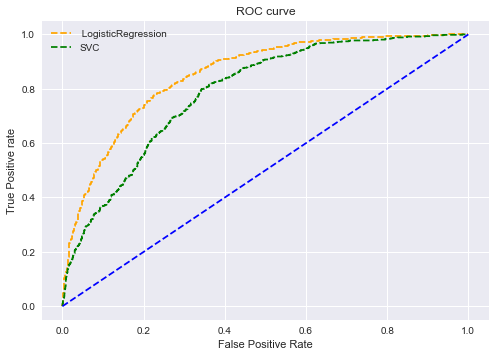

In [453]:
from sklearn.metrics import roc_curve
model1 = LogisticRegression()
# knn
model2 =SVC(kernel='rbf',probability=True)


# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=' LogisticRegression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SVC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

LOGISTIC REGRESSION IS BETTER IN CLASSIFYING POSITIVE CLASS IN THE DATASET.

SAVING THE MODEL

In [456]:
import pickle
filename2='telecom_customer_churn.sav'
pickle.dump(log,open(filename2,'wb'))

RELOADING THE MODEL

In [457]:
load_model2=pickle.load(open(filename2,'rb'))
result=load_model2.score(x_train,y_train)
result

0.7939805002119542